In [31]:
from io import BytesIO
from skimage import io
import requests
import pickle
from progressbar import ProgressBar

In [33]:
def read_images(im_lst):
    bar = ProgressBar()
    ims = []
    for im_url in bar(im_lst):
        res = requests.get(im_url)
        ims.append(io.imread(BytesIO(res.content)))
    return ims

In [3]:
import json
from skimage.transform import resize
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data_path = '/Users/nikita/Downloads/stolbn.json'

In [30]:
with open(data_path) as f:
    l = json.load(f)

In [32]:
ls = []
bar = ProgressBar()
for objs in bar(l):
    if 'mediaLinks' in objs.keys():
        ls.extend(objs['mediaLinks'])

100% (1885 of 1885) |#####################| Elapsed Time: 0:00:00 Time: 0:00:00


In [34]:
ims = read_images(ls)

100% (4259 of 4259) |#####################| Elapsed Time: 0:15:41 Time: 0:15:41


In [5]:
from sklearn.cluster import KMeans

In [ ]:
with open('ims_stolb.pickle', 'wb') as f:
    pickle.dump(ims, f)

In [6]:
with open('ims.pickle', 'rb') as f:
    ims = pickle.load(f)

/Volumes/Media/Documents/Programming/Git/memtor/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


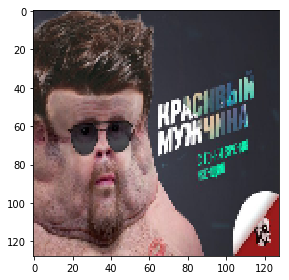

In [7]:
imshow(resize(ims[0], (128, 128, 3)))
plt.show()

In [8]:
ims_resized = []
for im in ims:
    ims_resized.append(resize(im, (128, 128, 3)).reshape((-1, 1)))

/Volumes/Media/Documents/Programming/Git/memtor/venv/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [9]:
import numpy as np

In [10]:
np.min([im.shape[0] for im in ims_resized])

49152

In [11]:
ims_resized = np.array(ims_resized).reshape((1039, 49152))

In [13]:
ims_resized.shape

(1039, 49152)

In [70]:
from skimage.transform import resize

In [71]:
resize?

In [68]:
ar.shape

(1039,)

In [14]:
km = KMeans()

In [15]:
ims_resized.shape

(1039, 49152)

In [32]:
ims_resized = np.array(ims_resized[0])

In [16]:
km.fit(np.array(ims_resized))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
cls = km.predict(ims_resized)

In [93]:
cls

array([7, 0, 7, ..., 7, 2, 2], dtype=int32)

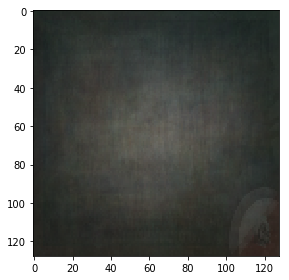

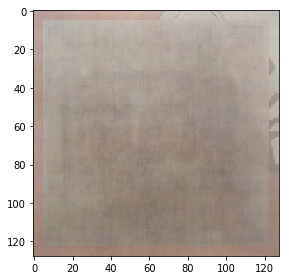

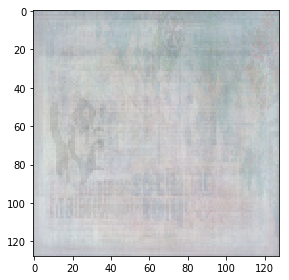

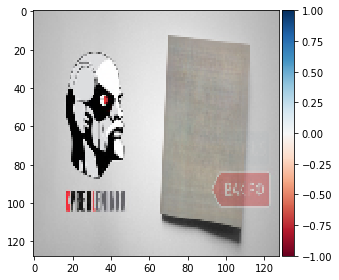

/Volumes/Media/Documents/Programming/Git/memtor/venv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


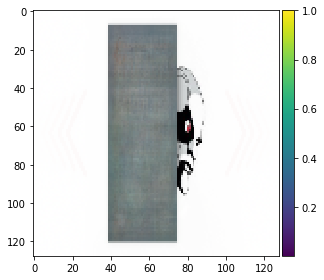

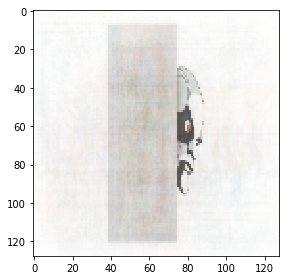

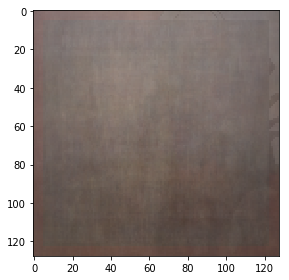

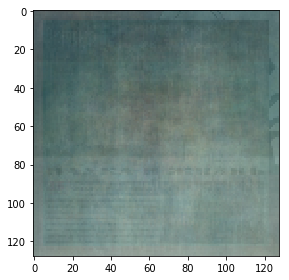

In [27]:
for i in range(8):
    io.imshow(km.cluster_centers_[i].reshape((128, 128, 3)))
    io.show()

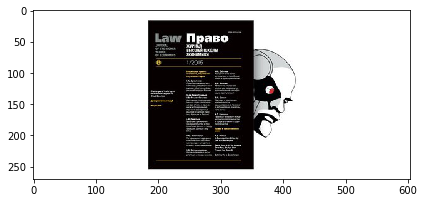

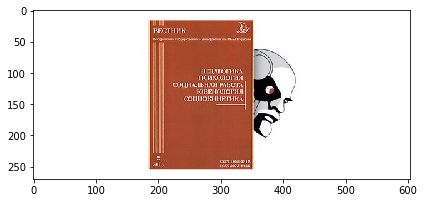

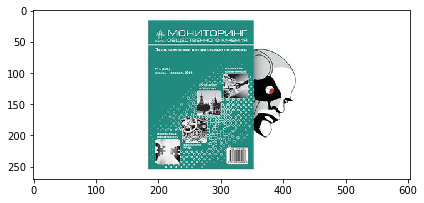

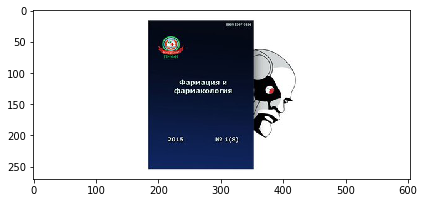

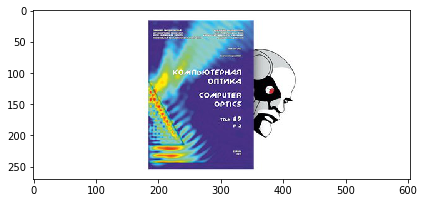

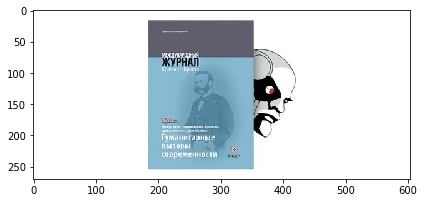

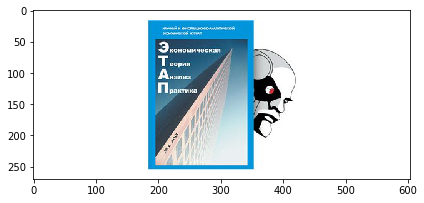

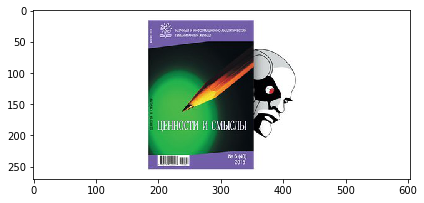

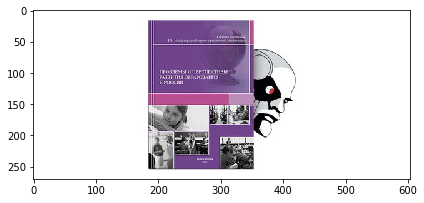

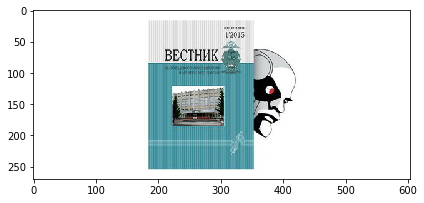

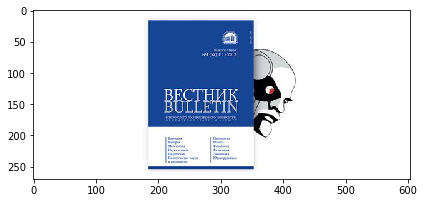

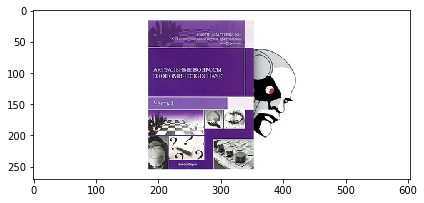

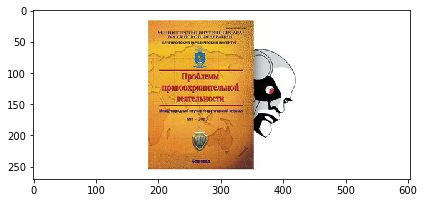

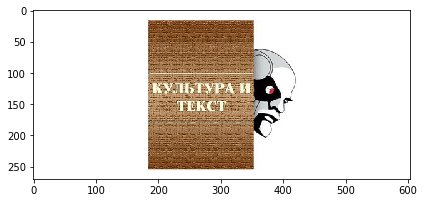

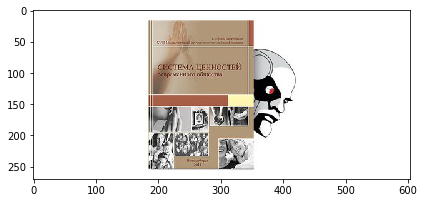

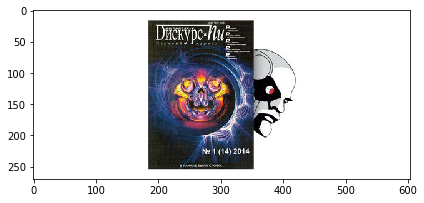

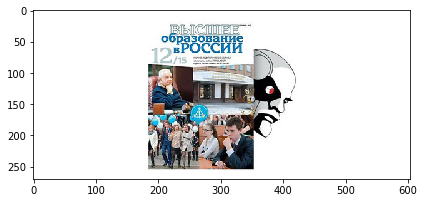

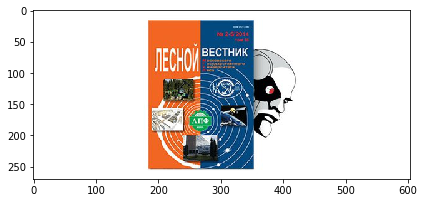

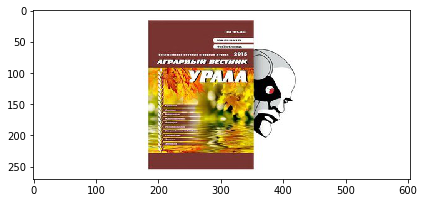

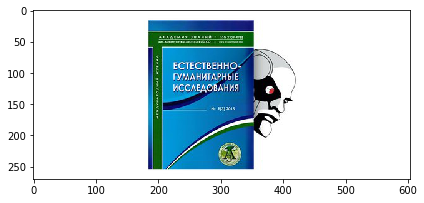

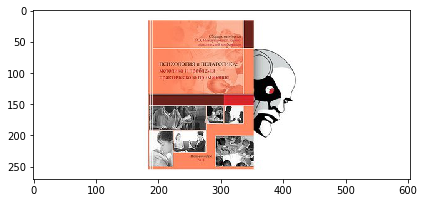

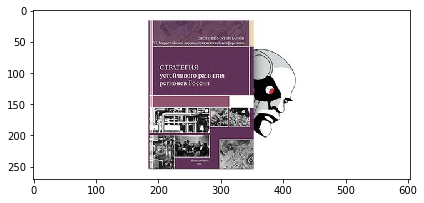

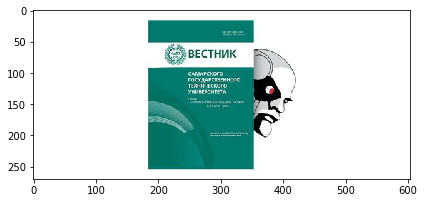

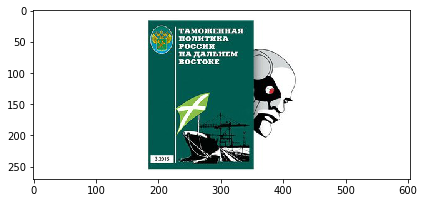

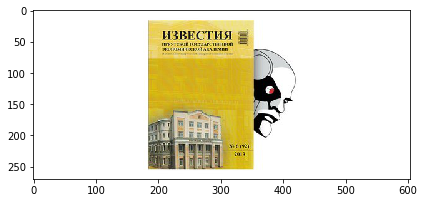

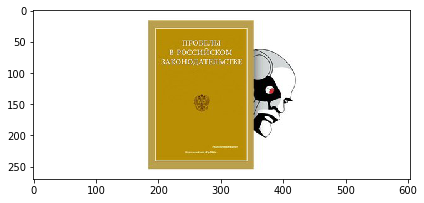

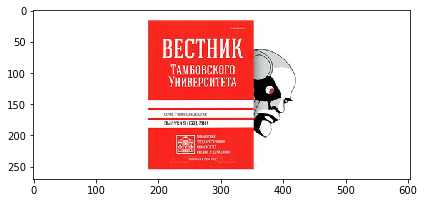

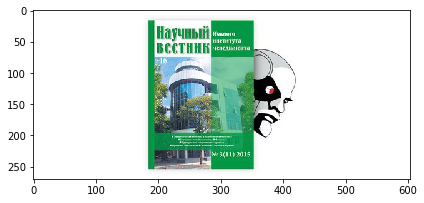

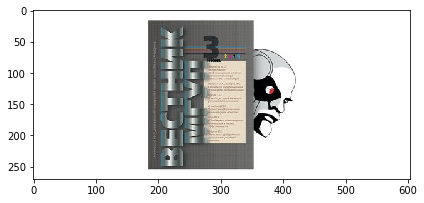

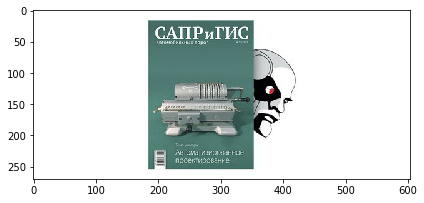

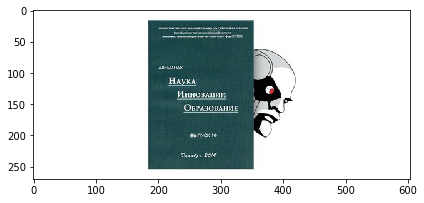

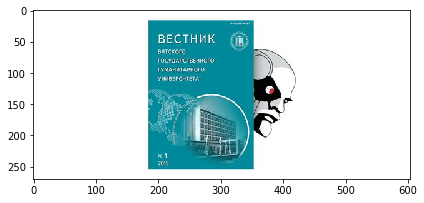

KeyboardInterrupt: 

In [28]:
for i, c in enumerate(cls):
    if c == 4:
        io.imshow(ims[i])
        io.show()